# Telco Customer Churn Prediction

A complete end-to-end Machine Learning project to predict whether a telecom customer will **churn** or not, based on their service usage patterns and contract details. The project walks through data analysis, preprocessing, feature engineering, model building, and deployment steps — all in a **Jupyter notebook** format.

---

## 📌 Problem Statement

Telecom companies are losing revenue due to customer churn (when a customer discontinues the service). The goal of this project is to:
- Identify the customers who are likely to churn
- Understand **why** they are likely to leave
- Help the business take preventive actions to **retain valuable customers**

---

## 📁 Dataset Overview

- **Source**: [Telco Customer Churn Dataset – Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)
- **Rows**: 7,043 customer records
- **Columns**: 21 features including demographics, account info, and service usage

### 📊 Key Features

| Column Name         | Description                           |
|---------------------|----------------------------------------|
| `gender`            | Gender of customer                     |
| `SeniorCitizen`     | Whether the customer is a senior       |
| `tenure`            | Number of months with the company      |
| `MonthlyCharges`    | Current monthly charge                 |
| `TotalCharges`      | Total charges to date                  |
| `InternetService`   | DSL, Fiber optic, or None              |
| `Contract`          | Month-to-month, One year, Two year     |
| `PaymentMethod`     | How they pay (electronic, mailed, etc) |
| `Churn`             | Target variable (Yes = churned)        |

---


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Display all the columns of the dataframe
pd.set_option('display.max_rows', 130)  # to view all 122 rows
pd.set_option('display.max_columns', None)  # show all columns
pd.set_option('display.width', 1000)  # avoid column wrapping

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv(r"D:\Projects\EDA_analysis\dataset\TeleCustomerChunDataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Shape of dataset

In [44]:
print(f"The number of rows is {df.shape[0]} and the number of columns is {df.shape[1]}")

The number of rows is 7043 and the number of columns is 21


List of columns in dataset


In [45]:
print(f"There are {len(df.columns)} columns in this dataset")
print("=" * 30)
print(f"The column name is stated below: {df.columns.sort_values()}")

There are 21 columns in this dataset
The column name is stated below: Index(['Churn', 'Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'TotalCharges', 'customerID', 'gender', 'tenure'], dtype='object')


Checking for Missing values

In [46]:
missing_cols = {feature: np.round(df[feature].isnull().mean() *100, 2)
                for feature in df.columns if df[feature].isnull().sum() > 0
                }

missing_series = pd.Series(missing_cols).sort_values(ascending=True)

print(f"The total number of coulmns which has missing values is {len(missing_cols)}")
print("="*30)
print(f"The columns with missing value is stated below:\n{missing_series}%")

The total number of coulmns which has missing values is 0
The columns with missing value is stated below:
Series([], dtype: object)%


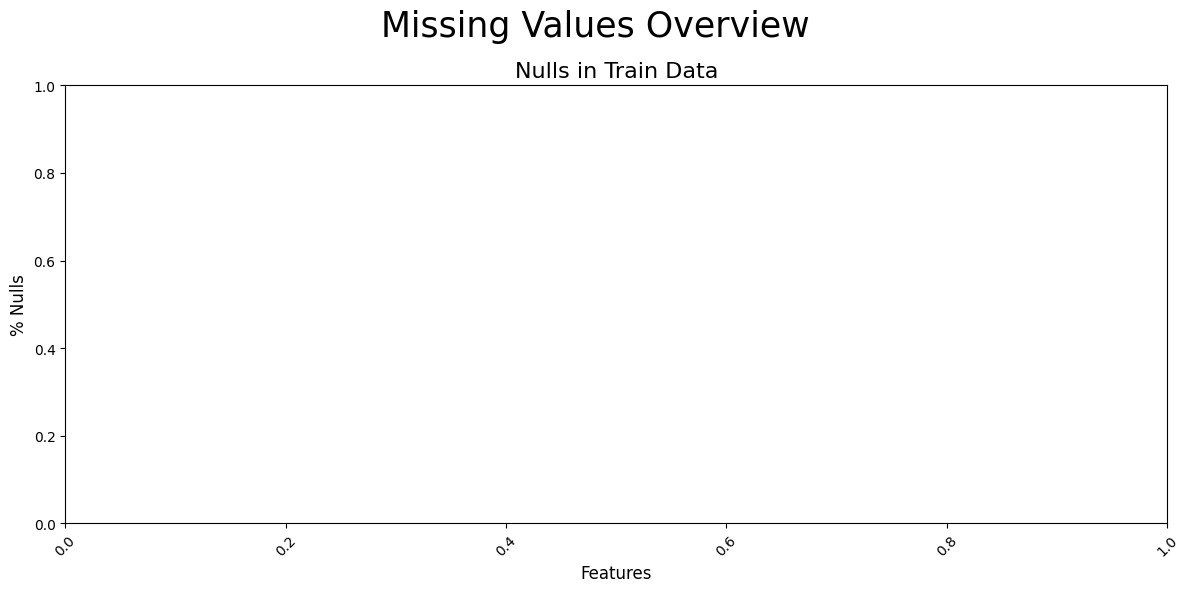

In [47]:
def plot_nulls_short(train):
    fig, ax = plt.subplots(figsize=(12, 6))  # removed list/loop since only one axis

    null_percent = train.isnull().mean() * 100
    null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
    sns.barplot(x=null_percent.index, y=null_percent.values, ax=ax)
    ax.set_title('Nulls in Train Data', fontsize=16)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('% Nulls', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    for i, val in enumerate(null_percent.values):
        ax.text(i, val + 1, f'{val:.1f}%', ha='center')

    plt.suptitle('Missing Values Overview', fontsize=25)
    plt.tight_layout()
    plt.show()

# Run it
plot_nulls_short(df)


Checking duplicate

In [48]:
print(f"There are {df.duplicated().sum()} duplicate rows")

There are 0 duplicate rows


Checking imbalance dataset

In [49]:
train_target = df["Churn"].value_counts()
print("The target distribution")
for label, train in train_target.items():
    print(f"{label}: {train}")


The target distribution
No: 5174
Yes: 1869


In [50]:
train_target = df["Churn"].value_counts(normalize=True)*100
print("The target distribution")
for label, train in train_target.items():
    print(f"{label}: {train}")


The target distribution
No: 73.4630129206304
Yes: 26.536987079369588


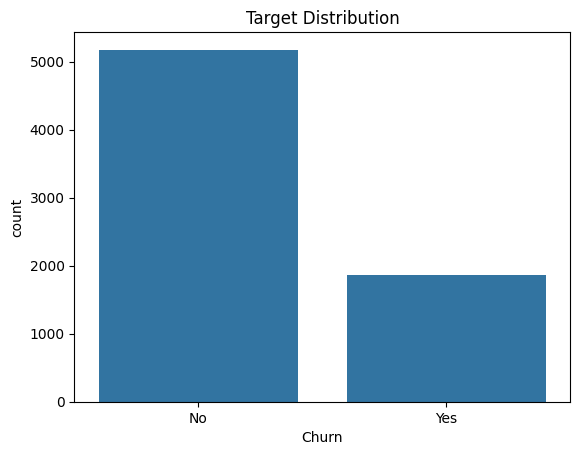

In [51]:
sns.countplot(x="Churn", data=df)
plt.title("Target Distribution")
plt.show()

The dataset is imbalance and we will use smote later during feature engineering

Checking Correlation with Target

In [52]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

num_df = df.select_dtypes(include=[np.number])

# Correlation of all numerical features with Churn
corr_target = num_df.corr()["Churn"].sort_values(ascending=False)

corr_target.head(20)


Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64

Checking the Statistical Information

In [53]:
df.describe().T.sort_values(by="std", ascending=True).head()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Checking the datatypes

In [54]:
print(f"The Datatype of each columns is sated below: \n{df.dtypes}")

The Datatype of each columns is sated below: 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


Numerical columns

In [59]:
numerical_columns = [feature for feature in df.columns if df[feature].dtypes != "O" and feature not in ["customerID","SeniorCitizen","Churn"]]

print(f"Numeber of numerical variable: {len(numerical_columns)}")

df[numerical_columns].head()

Numeber of numerical variable: 2


,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [60]:
for feature in numerical_columns:
    print(f"Unique Values: {feature}")
    print(df[feature].unique())
    print("=" * 40)

Unique Values: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique Values: MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


In [69]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")

categorical_columns = [feature for feature in df.columns if df[feature].dtypes == "O" and feature not in ["customerID", "TotalCharges"]]
print(f"Number of categorical variable:{len(categorical_columns)}")

df[categorical_columns].head()

Number of categorical variable:16


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [70]:
for feature in categorical_columns:
    print(f"Unique Values: {feature}")
    print(df[feature].unique())
    print("="*30)

Unique Values: gender
['Female' 'Male']
Unique Values: SeniorCitizen
[0 1]
Unique Values: Partner
['Yes' 'No']
Unique Values: Dependents
['No' 'Yes']
Unique Values: PhoneService
['No' 'Yes']
Unique Values: MultipleLines
['No phone service' 'No' 'Yes']
Unique Values: InternetService
['DSL' 'Fiber optic' 'No']
Unique Values: OnlineSecurity
['No' 'Yes' 'No internet service']
Unique Values: OnlineBackup
['Yes' 'No' 'No internet service']
Unique Values: DeviceProtection
['No' 'Yes' 'No internet service']
Unique Values: TechSupport
['No' 'Yes' 'No internet service']
Unique Values: StreamingTV
['No' 'Yes' 'No internet service']
Unique Values: StreamingMovies
['No' 'Yes' 'No internet service']
Unique Values: Contract
['Month-to-month' 'One year' 'Two year']
Unique Values: PaperlessBilling
['Yes' 'No']
Unique Values: PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


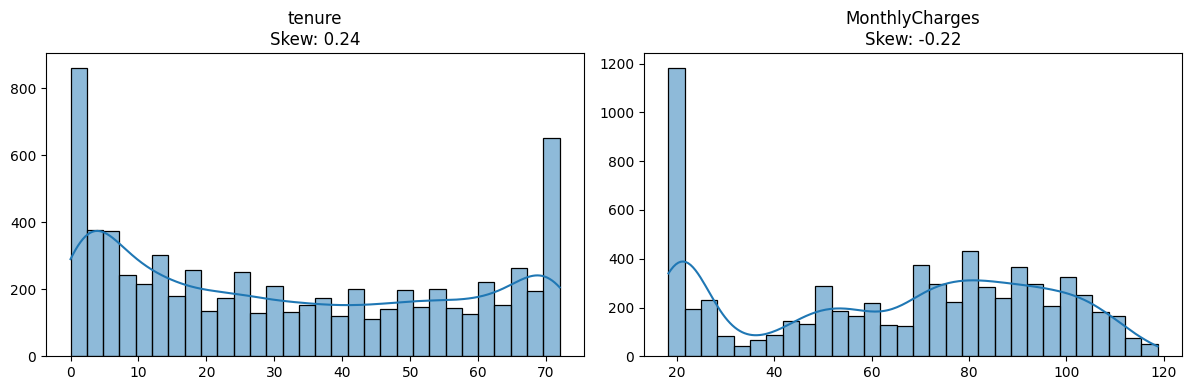

In [94]:
import math

# Assuming `continuous_numerical_columns` is your list of continuous features
n_cols = 3  # You can change this to 3 or 4 if you want more per row
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()  # Flatten in case of 1D

for i, feature in enumerate(numerical_columns):
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[i], palette="Set1")
    axes[i].set_title(f"{feature}\nSkew: {df[feature].skew():.2f}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

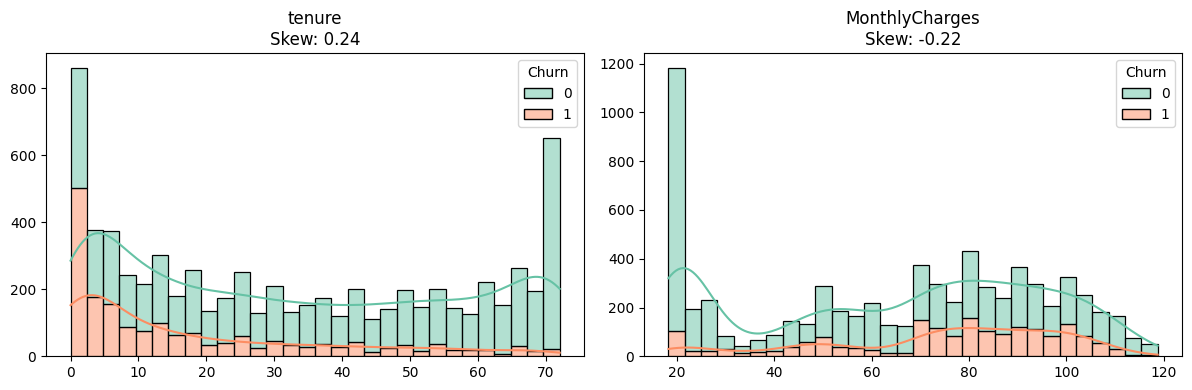

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_columns is defined
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(numerical_columns):
    sns.histplot(
        data=df,
        x=feature,
        hue='Churn',              # Split by churn
        kde=True,
        bins=30,
        multiple='stack',        # or 'dodge' for side-by-side
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f"{feature}\nSkew: {df[feature].skew():.2f}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


“We plotted stacked histograms of each numeric feature with hue='Churn' to visualise how the distribution of churners (orange) and non-churners (green) differs across the feature space. Height differences within a bin reveal how churn probability changes with that feature.”

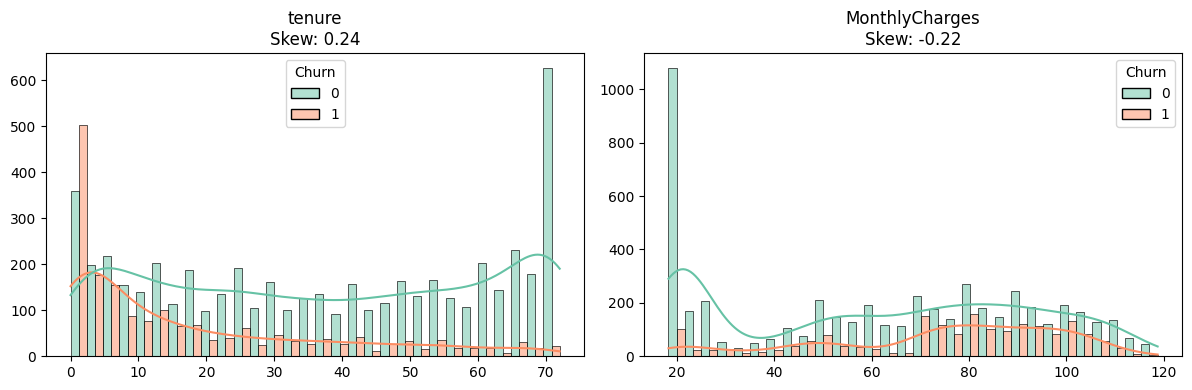

In [96]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_columns is defined
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(numerical_columns):
    sns.histplot(
        data=df,
        x=feature,
        hue='Churn',              # Split by churn
        kde=True,
        bins=30,
        multiple='dodge',        # or 'dodge' for side-by-side
        ax=axes[i],
        palette='Set2'
    )
    axes[i].set_title(f"{feature}\nSkew: {df[feature].skew():.2f}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [67]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

tenure: 0 outliers
MonthlyCharges: 0 outliers


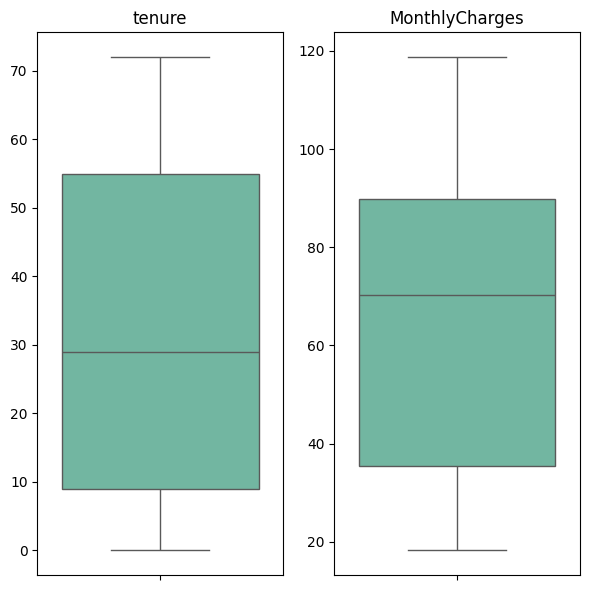

In [93]:
##Using box-plot
n_cols = 1
n_rows = math.ceil(len(numerical_columns)/n_cols)

fig, axes = plt.subplots(n_cols,n_rows, figsize=(n_cols*6, n_rows*3))
axes = axes.flatten()

for i, feature in enumerate(numerical_columns):
    sns.boxplot(df[feature],ax=axes[i],palette="Set2")
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

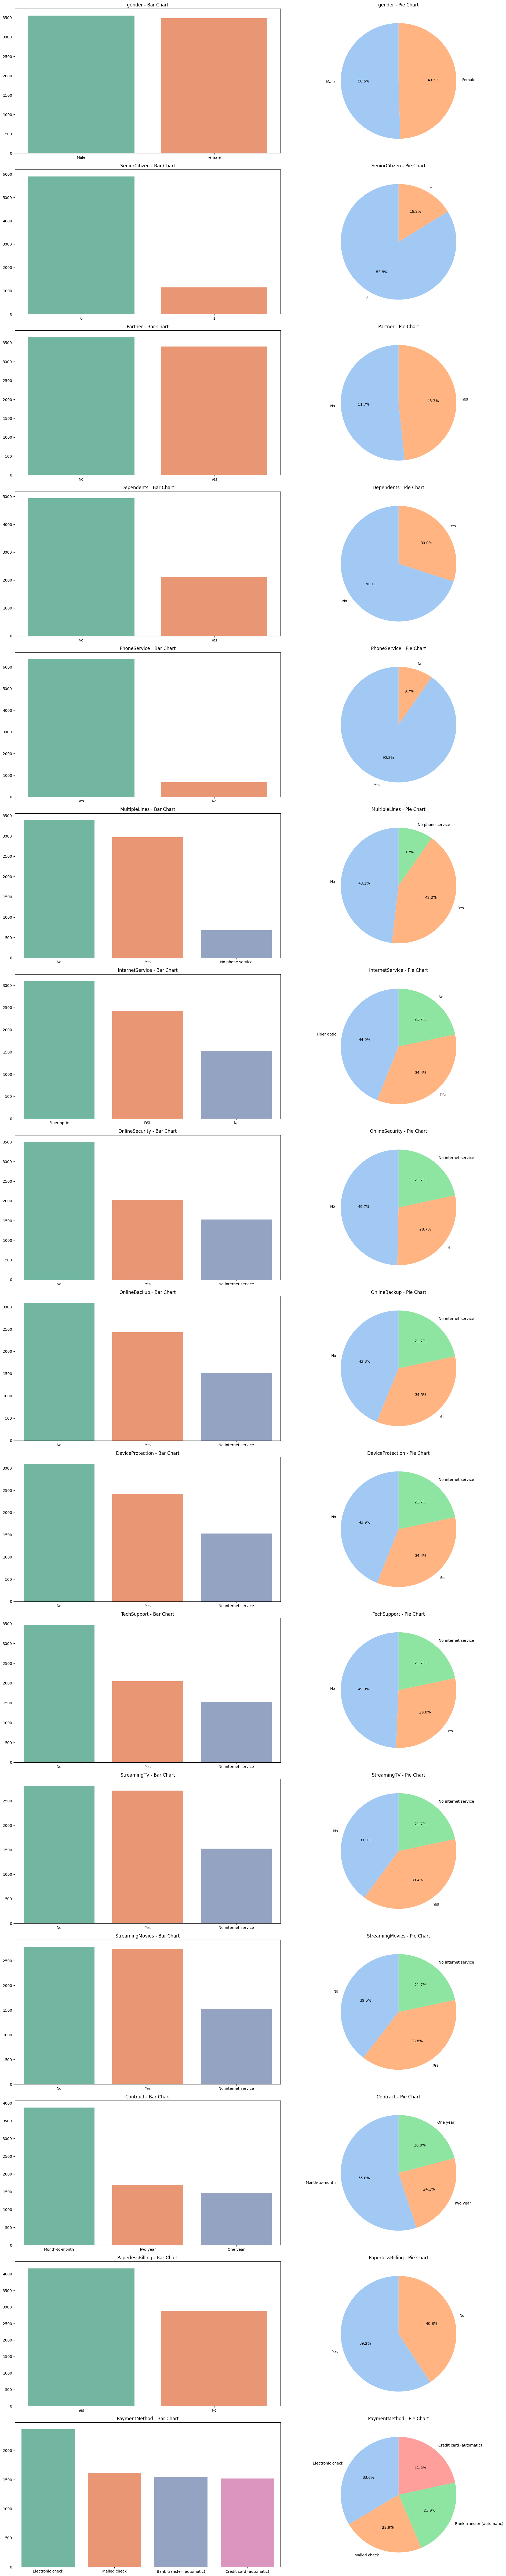

In [100]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Two plots per feature
total_plots = len(categorical_columns) * 2
n_cols = 2
n_rows = math.ceil(total_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*6))
axes = axes.flatten()

plot_idx = 0

for feature in categorical_columns:
    #  Bar Chart
    bar_ax = axes[plot_idx]
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=bar_ax,palette="Set2")
    bar_ax.set_title(f"{feature} - Bar Chart")
    bar_ax.set_xlabel("")
    bar_ax.set_ylabel("")
    plot_idx += 1

    #  Pie Chart
    pie_ax = axes[plot_idx]
    values = df[feature].value_counts()
    labels = values.index
    pie_ax.pie(values, labels=labels, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    pie_ax.set_title(f"{feature} - Pie Chart")
    plot_idx += 1

# Remove any leftover unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


“We plotted a bar and pie chart for each categorical variable to inspect frequency and balance. Imbalances (big bars/pie slices) reveal dominant categories that may bias the model; sparse tails suggest levels to combine or drop.”

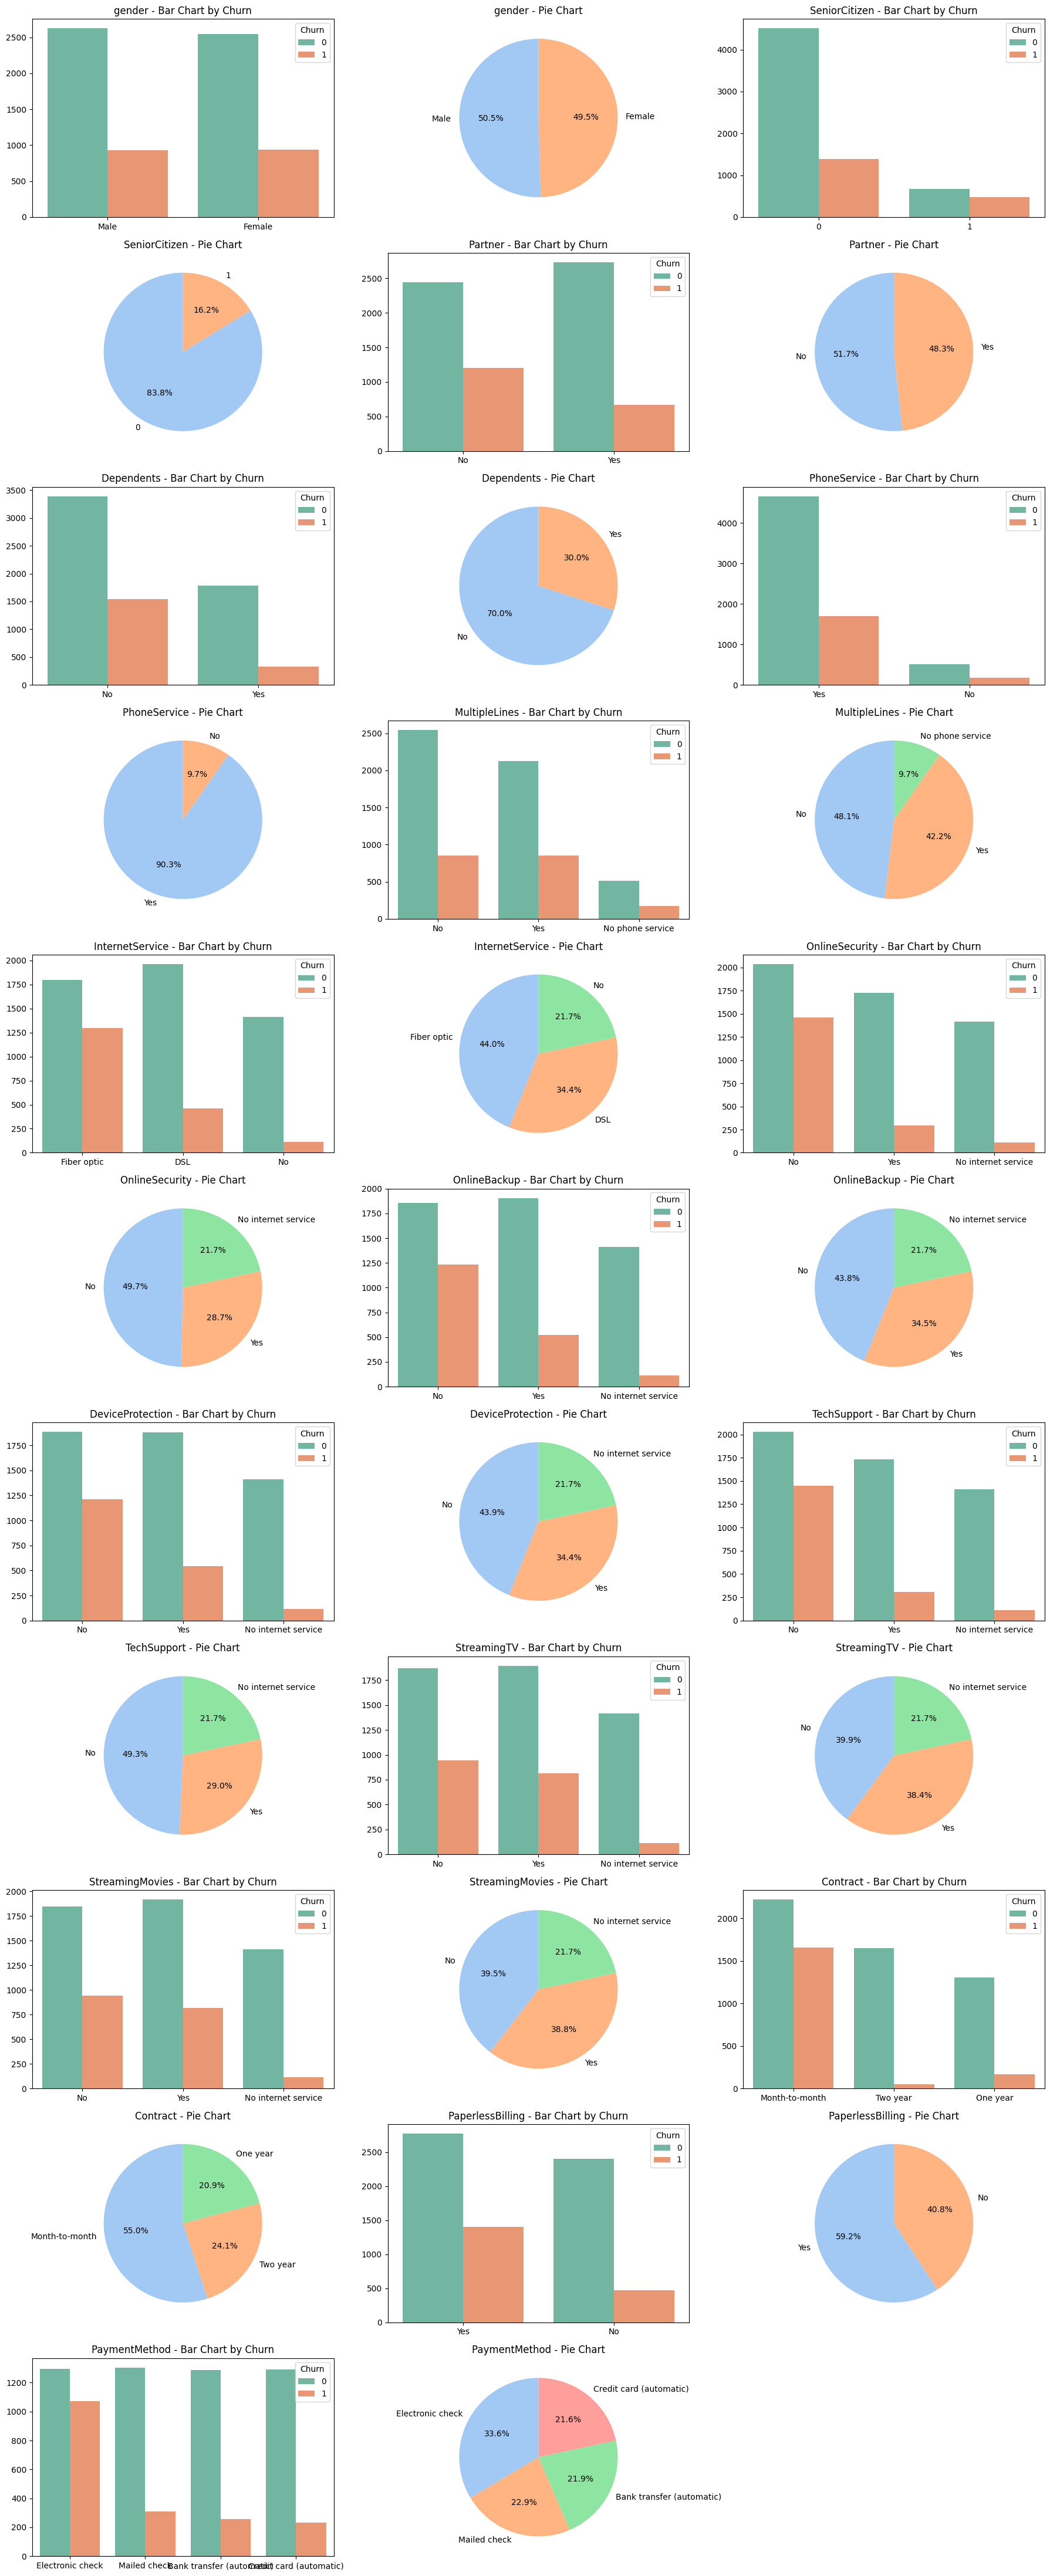

In [79]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Two plots per feature (bar + pie)
total_plots = len(categorical_columns) * 2
n_cols = 3
n_rows = math.ceil(total_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

plot_idx = 0

for feature in categorical_columns:
    # 📊 Bar Chart with hue='Churn'
    bar_ax = axes[plot_idx]
    sns.countplot(
        data=df,
        x=feature,
        hue='Churn',  # 👈 This shows split by churned vs not churned
        order=df[feature].value_counts().index,
        ax=bar_ax,
        palette="Set2"
    )
    bar_ax.set_title(f"{feature} - Bar Chart by Churn")
    bar_ax.set_xlabel("")
    bar_ax.set_ylabel("")
    plot_idx += 1

    # 🥧 Pie Chart (still full distribution, no split)
    pie_ax = axes[plot_idx]
    values = df[feature].value_counts()
    labels = values.index
    pie_ax.pie(
        values,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("pastel")
    )
    pie_ax.set_title(f"{feature} - Pie Chart")
    plot_idx += 1

# Remove any unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


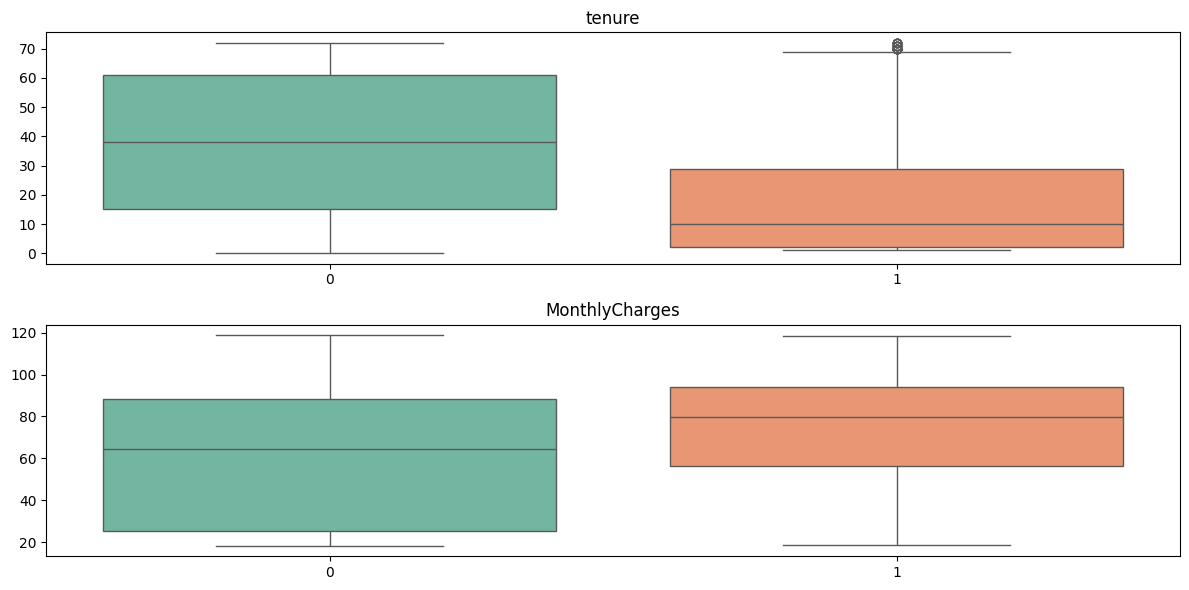

In [81]:
##Using box-plot
n_cols = 2
n_rows = math.ceil(len(numerical_columns)/n_cols)

fig, axes = plt.subplots(n_cols,n_rows, figsize=(n_cols*6, n_rows*6))
axes = axes.flatten()

for i, feature in enumerate(numerical_columns):
    sns.boxplot(data=df, x= 'Churn', y=feature,ax=axes[i],palette="Set2")
    axes[i].set_title(f"{feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [82]:
target_col = "Churn"

# # Safe map only if it's not already numeric
# if df[target_col].dtype == 'object':
#     df[target_col] = df[target_col].map({'Y': 1, 'N': 0})

for col in categorical_columns:
    print(f"\n{col} vs {target_col} (Normalized Counts):")
    print(df.groupby(col)[target_col].value_counts(normalize=True))

    print(f"\n{col} vs Avg Loan Approval Rate:")
    print(df.groupby(col)[target_col].mean())


for num_col in numerical_columns:
    print(f"\nAvg {num_col} by {col}:")
    print(df.groupby(col)[num_col].mean())


gender vs Churn (Normalized Counts):
gender  Churn
Female  0        0.730791
        1        0.269209
Male    0        0.738397
        1        0.261603
Name: proportion, dtype: float64

gender vs Avg Loan Approval Rate:
gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

SeniorCitizen vs Churn (Normalized Counts):
SeniorCitizen  Churn
0              0        0.763938
               1        0.236062
1              0        0.583187
               1        0.416813
Name: proportion, dtype: float64

SeniorCitizen vs Avg Loan Approval Rate:
SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

Partner vs Churn (Normalized Counts):
Partner  Churn
No       0        0.670420
         1        0.329580
Yes      0        0.803351
         1        0.196649
Name: proportion, dtype: float64

Partner vs Avg Loan Approval Rate:
Partner
No     0.329580
Yes    0.196649
Name: Churn, dtype: float64

Dependents vs Churn (Normalized Counts):
Dependents  Churn
N

### Key Categorical Drivers of Churn

| Feature | Category | Share of Customers | Churn Rate | Insight |
|---------|----------|--------------------|------------|---------|
| Contract | Month-to-Month | 55 % | **43 %** | Highest-risk segment → retention priority |
| InternetService | Fiber | 42 % | **42 %** | Fast but pricey—price-sensitive exits |
| PaymentMethod | Electronic Check | 34 % | **45 %** | e-Check users churn nearly half the time |
| SeniorCitizen | Yes | 17 % | **42 %** | Senior segment shows elevated churn |
| Contract | Two-Year | 12 % | **3 %** | Long contracts protect against churn |


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Loop over each categorical column
for cat_col in categorical_columns:
    print(f"\nVisualizing numeric features grouped by: {cat_col}")

    n_cols = 2
    n_rows = math.ceil(len(numerical_columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    axes = axes.flatten()

    for i, num_col in enumerate(numerical_columns):
        sns.barplot(data=df, x=cat_col, y=num_col, ax=axes[i], palette='Set2',hue='Churn')
        axes[i].set_title(f"Avg {num_col} by {cat_col}")
        axes[i].set_ylabel(num_col)
        axes[i].set_xlabel("")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


NameError: name 'categorical_columns' is not defined

In [ ]:
import pandas as pd

cat_cols = [
    'gender','SeniorCitizen','Partner','Dependents','PhoneService',
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod'
]

summary_frames = []

for col in cat_cols:
    pop_pct   = df[col].value_counts(normalize=True)          # overall share
    churn_pct = df.groupby(col)['Churn'].mean()               # churn rate
    frame = pd.DataFrame({
        'feature'   : col,
        'category'  : pop_pct.index,
        'pop_pct'   : (pop_pct*100).round(2),
        'churn_pct' : (churn_pct*100).round(2)
    })
    summary_frames.append(frame.reset_index(drop=True))

summary = pd.concat(summary_frames, ignore_index=True)
summary.to_csv('categorical_churn_summary.csv', index=False)
print("Saved ➜ categorical_churn_summary.csv")
